In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

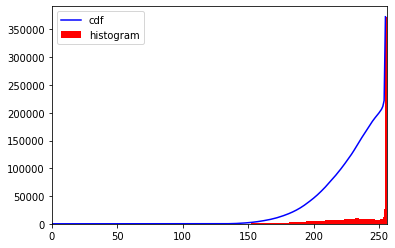

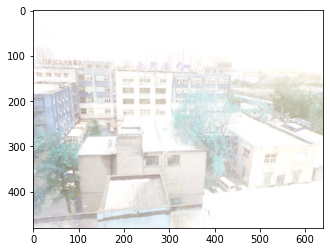

In [9]:
img_str = 'sample01.jpg'

img = cv2.imread(img_str, cv2.IMREAD_COLOR)
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.figure(1)
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()

plt.imshow(img, cmap = 'viridis')

True

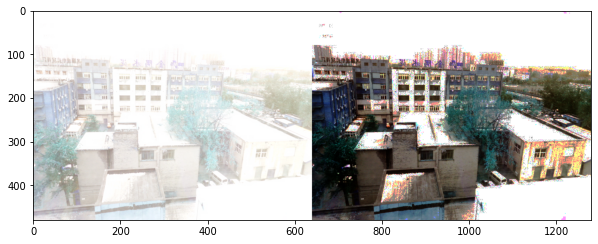

In [10]:
# calculate cdf
cdf_m = np.ma.masked_equal(cdf, 0)
#将cdf值域map到0-255
cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

# mapping
img2 = cdf[img]

res = np.hstack((img, img2))
cv2.imwrite(f'baseline/{img_str}', res)
plt.figure(figsize=(10,10))
plt.imshow(res, cmap="viridis")
cv2.imwrite('ll.jpg', res)

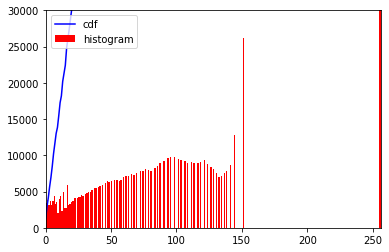

In [11]:
hist, bins = np.histogram(img2.flatten(), 256, [0, 256])

cdf = hist.cumsum()
cdf_normalized = cdf *hist.max() / cdf.max()

plt.plot(cdf_normalized, color='b')
plt.hist(img2.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.ylim([0, 30000])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()

In [ ]:

def vanila_HE(img_str, path = 'baseline'):

    img = cv2.imread(img_str, cv2.IMREAD_COLOR)
    if img is None:
        return 

    hist, bins = np.histogram(img.flatten(), 256, [0, 256])

    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # calculate cdf
    cdf_m = cdf_normalized#np.ma.masked_equal(cdf, 0)
    #将cdf值域map到0-255
    cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    # mapping
    img2 = cdf[img]

    res = np.hstack((img, img2))
    cv2.imwrite(f'{path}/{img_str}', res)
    plt.figure(figsize=(10,10))
    plt.imshow(res, cmap="viridis")
    cv2.imwrite('ll.jpg', res)


for img in os.listdir('.'):
    
    vanila_HE(img)

In [ ]:

def biased_HE(img_str, alpha = 0.5, path = 'biased'):

    img = cv2.imread(img_str, cv2.IMREAD_COLOR)
    if img is None:
        return 

    hist, bins = np.histogram(img.flatten(), 256, [0, 256])

    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # calculate cdf
    cdf_m = cdf_normalized#np.ma.masked_equal(cdf, 0)
    #将cdf值域map到0-255
    cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    # mapping
    img2 = cdf[img] * alpha + (1 - alpha) * img

    res = np.hstack((img, img2))
    cv2.imwrite(f'{path}/{img_str}', res)
    plt.figure(figsize=(10,10))
    plt.imshow(res, cmap="viridis")
    cv2.imwrite('ll.jpg', res)


for img in os.listdir('.'):
    
    biased_HE(img, 0.5)

In [5]:
image = cv2.imread('sample01.jpg')
#image = cv2.resize(image, (500, 600))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit = 5)
final_img = clahe.apply(image)
cv2.imshow("orig", image)
cv2.namedWindow('CLAHE image', cv2.WINDOW_NORMAL)
cv2.imshow("CLAHE image", final_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
cdf_.shape

(256,)